# Support Vector Machines

## Machine Learning Methods 


### Module 6: Advanced Machine Learning Models 
#### Part 1: Support Vector Machines

### Instructor: Farhad Pourkamali



### Overview 
<hr style="border:2px solid gray">

**Support Vector Machines (SVMs)** are supervised learning algorithms widely used for:

- Classification
- Regression

**Key Advantages of SVMs**:

- **Effective in high-dimensional spaces**, making them ideal for complex datasets.
- **Still effective even when the number of features exceeds the number of samples**.
- **Versatile**, allowing the use of different kernel functions (linear, polynomial, radial basis function), with the option to define custom kernels.

Video: https://youtu.be/h6WSGd-FQL0

### Problem formulation
<hr style="border:2px solid gray">

- In Support Vector Machine (SVM) literature, it's common practice to represent binary class labels as **−1 and +1** (instead of 0 and 1).
  - This simplifies mathematical derivations and computations.

- A linear SVM classifier predicts classes using the following decision rule:

\begin{equation*}
h(\mathbf{x}) = \text{sign}(f(\mathbf{x}))
\end{equation*}

- The decision boundary is defined by the linear function:

\begin{equation*}
f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b
\end{equation*}

- **Definitions:**
  - $\mathbf{w}$: weight vector, determines the orientation and steepness of the decision boundary.
  - $b$: bias term, controls the position of the decision boundary relative to the origin.

- **Hyperplane:**
  - A hyperplane is a flat subspace that separates the feature space into two distinct regions.
  - Examples:
    - In 2D, a hyperplane is a straight line.
    - In 3D, a hyperplane is a plane.
    - In higher dimensions, a hyperplane generalizes accordingly.

- **Sign function:**

\begin{equation*}
\text{sign}(z) =
\begin{cases}
+1 & \text{if } z > 0 \\
-1 & \text{if } z < 0 \\
0 & \text{if } z = 0
\end{cases}
\end{equation*}

- **Making predictions** with a linear SVM classifier:
  - Calculate $f(\mathbf{x})$ and apply the sign function to determine class membership.

- **Training the classifier:**
  - Training involves determining optimal $\mathbf{w}$ and $b$ by maximizing the **margin**.
  - **Margin:** the shortest distance between the hyperplane and the closest data points (**support vectors**) from both classes.
  - Maximizing this margin ensures robust, reliable predictions and better generalization to unseen data.


<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/margin.png?raw=true" width=400 height=300   align="center">


### Finding the margin
<hr style="border:2px solid gray">

#### Step 1: Distance from a point to a hyperplane
- Consider a hyperplane defined by:
\begin{equation*}
\mathcal{H} = \{\mathbf{x} \mid \mathbf{w}^T\mathbf{x} + b = 0\}
\end{equation*}

- **Question:** How can we measure the distance of a point $\mathbf{x}$ to this hyperplane?

<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/dist.png?raw=true" width=200 align="center">

- **Intuition:**
  - To find the distance, project point $\mathbf{x}$ perpendicularly onto the hyperplane.
  - Let’s call this projection $\mathbf{x}^P$. Then:
\begin{equation*}
\mathbf{x}^P = \mathbf{x} - \mathbf{d}
\end{equation*}
where $\mathbf{d}$ is the shortest vector from $\mathbf{x}$ to the hyperplane.

- Since $\mathbf{d}$ is perpendicular to the hyperplane, it must be parallel to $\mathbf{w}$:
\begin{equation*}
\mathbf{d} = \alpha \mathbf{w},\quad \alpha \in \mathbb{R}
\end{equation*}

- Because the projected point $\mathbf{x}^P$ lies exactly on the hyperplane:
\begin{equation*}
\mathbf{w}^T\mathbf{x}^P + b = 0
\end{equation*}

- Substituting the above, we get:
\begin{equation*}
\mathbf{w}^T(\mathbf{x} - \alpha \mathbf{w}) + b = 0
\end{equation*}

- Solving for $\alpha$:
\begin{equation*}
\alpha = \frac{\mathbf{w}^T\mathbf{x}+b}{\mathbf{w}^T\mathbf{w}}
\end{equation*}

- Therefore, the distance from the point $\mathbf{x}$ to the hyperplane is:
\begin{equation*}
\|\mathbf{d}\|_2 = \|\alpha \mathbf{w}\|_2 = |\alpha|\|\mathbf{w}\|_2
\end{equation*}


\begin{equation*}
\|\mathbf{d}\|_2 = \frac{|\mathbf{w}^T\mathbf{x} + b|}{\|\mathbf{w}\|_2^2} \|\mathbf{w}\|_2
= \frac{|\mathbf{w}^T\mathbf{x} + b|}{\|\mathbf{w}\|_2}
\end{equation*}


---

#### Step 2: Margin definition for dataset
- The **margin** is defined as the shortest distance between the hyperplane and the closest point(s) from either class:
\begin{equation*}
\gamma(\mathbf{w}, b) = \min_{\mathbf{x}_n}\frac{|\mathbf{w}^T\mathbf{x}_n + b|}{\|\mathbf{w}\|_2}
\end{equation*}

---

#### Step 3: Finding the maximum margin hyperplane
- Our goal in training an SVM is to **maximize the margin** while correctly classifying all data points. This is a constrained optimization problem:
\begin{equation*}
\underbrace{\max_{\mathbf{w}, b}\gamma(\mathbf{w}, b)}_{\text{maximize margin}}
\quad\text{such that}\quad
\underbrace{y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 0,\;\forall n}_{\text{correctly classifies all points}}
\end{equation*}

- Plugging the margin definition explicitly, the optimization problem becomes:
\begin{equation*}
\underbrace{
\max_{\mathbf{w}, b}
\frac{1}{\|\mathbf{w}\|_2}\min_{\mathbf{x}_n}\left|\mathbf{w}^T\mathbf{x}_n + b\right|
}_{\text{maximize margin}}
\quad\text{s.t.}\quad
\underbrace{y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 0,\;\forall n}_{\text{correctly classifies all points}}
\end{equation*}

---

#### Important note (scale invariance)
- The margin definition is scale-invariant:
  - Multiplying $\mathbf{w}$ and $b$ by a non-zero constant does not change the hyperplane.

### Optimization problem
<hr style="border:2px solid gray">


- A common choice is to fix the scale such that the distance to the nearest points (support vectors) is exactly $1/\|\mathbf{w}\|_2$:

\begin{equation*}
\min_{\mathbf{x}_n} |\mathbf{w}^T \mathbf{x}_n + b| = 1
\end{equation*}

- With this scaling convention, maximizing the margin is equivalent to minimizing the norm of the weight vector $\mathbf{w}$:

\begin{align}
&\min_{\mathbf{w},b} \mathbf{w}^\top\mathbf{w} \\
&\textrm{subject to:}\quad \{
y_n(\mathbf{w}^T \mathbf{x}_n + b) \geq 1, & \text{for all data points } n
\}
\end{align}

**Why is this simpler?**
- The condition $y_n(\mathbf{w}^T \mathbf{x}_n + b) \geq 1$ ensures all data points are correctly classified and placed at or beyond this margin boundary.

### SVM with soft constraints
<hr style="border:2px solid gray">

* If there is no separating hyperplane, then solve

\begin{equation*}
\min_{\mathbf{w}, b, \xi_n} \mathbf{w}^\top\mathbf{w} + C\sum_{n=1}^{N}\xi_n
\end{equation*}

- subject to constraints:

\begin{equation*}
y_{n}(\mathbf{w}^T \mathbf{x}_{n} + b) \geq 1 - \xi_n,\quad \forall n
\end{equation*}

\begin{equation*}
\xi_n \geq 0,\quad \forall n
\end{equation*}

- **Interpretation:**
  - $\xi_n$ measures how much the n-th data point violates the margin constraint.
  - The goal is still to maximize the margin, but now we balance margin maximization against penalizing margin violations, controlled by the penalty term $\sum_n \xi_n$.

- The hyperparameter controlling this trade-off determines the balance between margin maximization and minimizing misclassification errors.

* **Illustration**

<img src="https://github.com/farhad-pourkamali/MATH4388Online/blob/main/images/softmargin.png?raw=true" width=500 height=400   align="center">


### Creating an SVM model using Scikit-Learn
<hr style="border:2px solid gray">

* Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
* The penalty term $C$ controls the strength of this penalty, and as a result, acts as an **inverse** regularization parameter

    * Higher $C$ → Less regularization (tries harder to avoid margin violations, leading to a more complex decision boundary).
    * Lower $C$ → More regularization (allows more margin violations, leading to a simpler decision boundary with better generalization).
    
---
#### The role of kernel functions:
- **Linear Decision Function**: In a linear SVM, the decision function is:

  \begin{equation*}
  f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
  \end{equation*}

  where $\mathbf{w}$ is the weight vector, $\mathbf{x}$ is the input feature vector, and $b$ is the bias term.

- **Dual Formulation**: The optimization problem can be expressed in its dual form, where the decision function depends only on the dot products between input vectors:

  \begin{equation*}
  f(\mathbf{x}) = \beta_0 +\sum_{i=1}^n \alpha_i \langle \mathbf{x},\mathbf{x}_i \rangle
  \end{equation*}

where there are $n$ parameters $\alpha_i$, $i=1,\ldots,n$, one per training observation.

- **Kernel Trick**: To handle non-linearly separable data, we map the input features into a higher-dimensional space using a mapping function $\varphi(\mathbf{x})$. The decision function becomes:

  \begin{equation*}
  f(\mathbf{x}) = \beta_0 +\sum_{i=1}^n \alpha_i \langle \varphi(\mathbf{x}),\varphi(\mathbf{x}_i) \rangle
  \end{equation*}

  Computing $\varphi(\mathbf{x})$ explicitly can be computationally expensive. Instead, we use a **kernel function** $K(\mathbf{x}, \mathbf{x}_i)$ that computes the dot product in the higher-dimensional space without explicit mapping:

  \begin{equation*}
  K(\mathbf{x}, \mathbf{x}_i) = \langle \varphi(\mathbf{x}), \varphi(\mathbf{x}_i) \rangle
  \end{equation*}

  This approach is known as the kernel trick, allowing SVMs to learn complex, non-linear decision boundaries efficiently.

---
#### Common Kernel Functions:
- **Linear Kernel**: $ K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^\top \mathbf{x}_j $
- **Polynomial Kernel**: $ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i^\top \mathbf{x}_j + c)^d $
- **Radial Basis Function (RBF) Kernel**: $ K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2) $

By choosing an appropriate kernel, SVMs can effectively handle non-linear separations in the data without explicitly transforming the feature space.

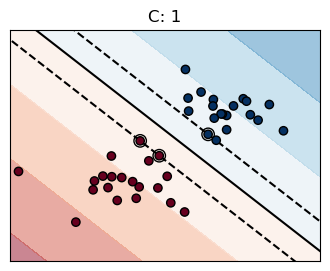

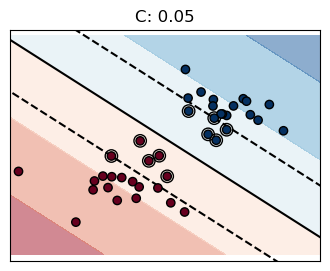

In [3]:
# Source: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py

import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    # At the decision boundary, w0*xx + w1*yy + b = 0
    # => yy = -w0/w1 * xx - b/w1
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(f"C: {penalty}")

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

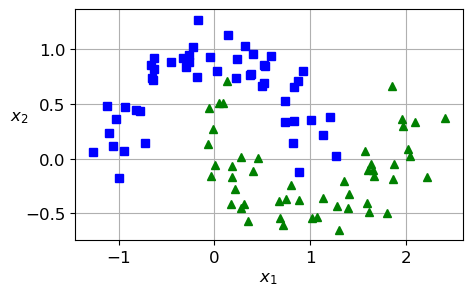

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=1, C=1e5)) # try 1e-5

rbf_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100000.0, gamma=1))])

In [14]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

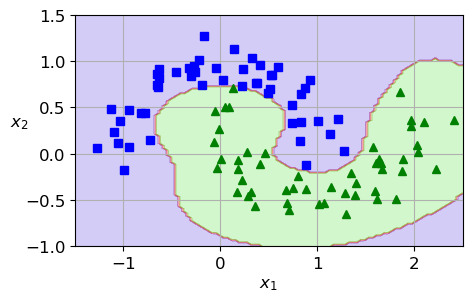

In [16]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### SVMs for regression
<hr style="border:2px solid gray">

* Instead of trying to fit the largest possible *street* between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations

    * You can use the SVR class, which is the regression equivalent of the SVC class
    
* Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 
    * Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

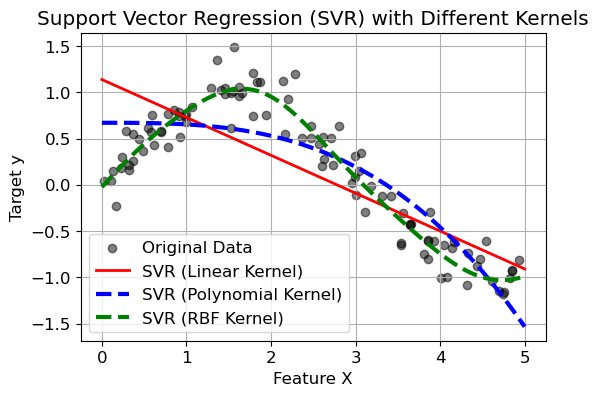

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic non-linear data
np.random.seed(42)  # For reproducibility
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # Feature values (1D)
y = np.sin(X).ravel() + 0.2 * np.random.randn(100)  # Target values with noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train SVR models with different kernels
svr_linear = SVR(kernel="linear", C=10, epsilon=.1)
svr_poly = SVR(kernel="poly", C=10, epsilon=.1, degree=3)
svr_rbf = SVR(kernel="rbf", C=10, epsilon=.1, gamma=0.5)

svr_linear.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

# Step 4: Make predictions
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)  # Generate smooth input for visualization
y_pred_linear = svr_linear.predict(X_plot)
y_pred_poly = svr_poly.predict(X_plot)
y_pred_rbf = svr_rbf.predict(X_plot)

# Step 5: Visualization
plt.figure(figsize=(6, 4))

# Plot original data points
plt.scatter(X, y, color="black", label="Original Data", alpha=0.5)

# Plot SVR predictions
plt.plot(X_plot, y_pred_linear, color="red", lw=2, label="SVR (Linear Kernel)")
plt.plot(X_plot, y_pred_poly, color="blue", lw=3, linestyle="dashed", label="SVR (Polynomial Kernel)")
plt.plot(X_plot, y_pred_rbf, color="green", lw=3, linestyle="dashed", label="SVR (RBF Kernel)")

# Customize plot
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Support Vector Regression (SVR) with Different Kernels")
plt.legend()
plt.grid()
plt.show()
